In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


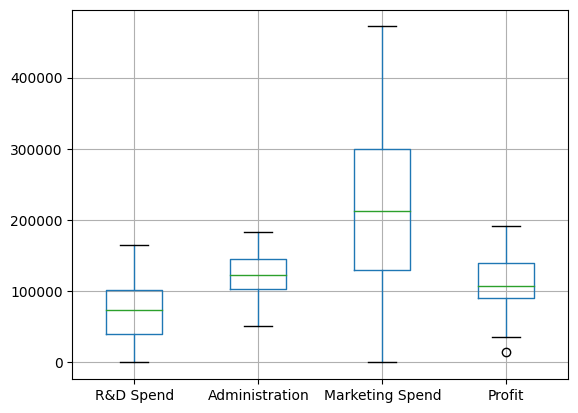

In [2]:
#Reading Data
df = pd.read_csv('50_Startups.csv')
# Display basic information and box plot
df.info()
df.boxplot()
#Handling Categorical Data
df = pd.get_dummies(df, columns=['State'], drop_first=True)

In [3]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Profit', axis=1)
y = df['Profit']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
#Data Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [5]:
#Model Fitting and Pipelining

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
#Predicting and Evaluation
y_pred = regressor.predict(X_test)
# R2 Score
print("R2 Score:", r2_score(y_test, y_pred))
# RMSE
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
# MSE
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
# MAE (Optional)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9347068473282426
Root Mean Squared Error (RMSE): 9137.990152794933
Mean Squared Error (MSE): 83502864.03257717
Mean Absolute Error (MAE): 7514.293659640595
